# Dataset 2

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

df = pd.read_csv('ndtv_data_final.csv', delimiter=',', skipinitialspace=True)
print(df.columns)

Index(['Unnamed: 0', 'Name', 'Brand', 'Model', 'Battery capacity (mAh)',
       'Screen size (inches)', 'Touchscreen', 'Resolution x', 'Resolution y',
       'Processor', 'RAM (MB)', 'Internal storage (GB)', 'Rear camera',
       'Front camera', 'Operating system', 'Wi-Fi', 'Bluetooth', 'GPS',
       'Number of SIMs', '3G', '4G/ LTE', 'Price'],
      dtype='object')


In [36]:
df.head()

,Unnamed: 0,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,58998
1,1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,27999
2,2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,106900
3,3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,62900
4,4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,49990


As we can see, the dataset contains more specific values such as the name, brand, model and the exact price. We need to delete the column with 'unnamed: 0'. Also, here we will convert the value of price from INR to PHP.

In [37]:
df.drop('Unnamed: 0', axis=1, inplace=True)
#Convert price into Philippine Pesos price
df['Price']=df['Price']*0.70
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,Yes,1440,3120,8,12000,...,48.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,41298.6
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,Yes,1080,2400,8,6000,...,64.0,16.0,Android,Yes,Yes,Yes,2,Yes,Yes,19599.3
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,Yes,1242,2688,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,74830.0
3,iPhone 11,Apple,iPhone 11,3110,6.10,Yes,828,1792,6,4000,...,12.0,12.0,iOS,Yes,Yes,Yes,2,Yes,Yes,44030.0
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,Yes,1080,2340,8,6000,...,12.0,32.0,Android,Yes,Yes,Yes,1,No,No,34993.0


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Name                    1359 non-null   object 
 1   Brand                   1359 non-null   object 
 2   Model                   1359 non-null   object 
 3   Battery capacity (mAh)  1359 non-null   int64  
 4   Screen size (inches)    1359 non-null   float64
 5   Touchscreen             1359 non-null   object 
 6   Resolution x            1359 non-null   int64  
 7   Resolution y            1359 non-null   int64  
 8   Processor               1359 non-null   int64  
 9   RAM (MB)                1359 non-null   int64  
 10  Internal storage (GB)   1359 non-null   float64
 11  Rear camera             1359 non-null   float64
 12  Front camera            1359 non-null   float64
 13  Operating system        1359 non-null   object 
 14  Wi-Fi                   1359 non-null   

Also, there are columns that contains strings in Yes or No values that needs to be in binary integer (1 or 0) since they might be relevant to our prediction modelling.

In [39]:
df['Touchscreen']= df['Touchscreen'].map({'Yes': 1 ,'No': 0})
df['Wi-Fi']= df['Wi-Fi'].map({'Yes': 1 ,'No': 0})
df['Bluetooth']= df['Bluetooth'].map({'Yes': 1 ,'No': 0})
df['GPS']= df['GPS'].map({'Yes': 1 ,'No': 0})
df['3G']= df['3G'].map({'Yes': 1 ,'No': 0})
df['4G/ LTE']= df['4G/ LTE'].map({'Yes': 1 ,'No': 0})
df.head()

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
0,OnePlus 7T Pro McLaren Edition,OnePlus,7T Pro McLaren Edition,4085,6.67,1,1440,3120,8,12000,...,48.0,16.0,Android,1,1,1,2,1,1,41298.6
1,Realme X2 Pro,Realme,X2 Pro,4000,6.50,1,1080,2400,8,6000,...,64.0,16.0,Android,1,1,1,2,1,1,19599.3
2,iPhone 11 Pro Max,Apple,iPhone 11 Pro Max,3969,6.50,1,1242,2688,6,4000,...,12.0,12.0,iOS,1,1,1,2,1,1,74830.0
3,iPhone 11,Apple,iPhone 11,3110,6.10,1,828,1792,6,4000,...,12.0,12.0,iOS,1,1,1,2,1,1,44030.0
4,LG G8X ThinQ,LG,G8X ThinQ,4000,6.40,1,1080,2340,8,6000,...,12.0,32.0,Android,1,1,1,1,0,0,34993.0


The following are checkpoints for counting null, blank or zero values.

In [40]:
df.isnull().sum()

Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [41]:
df.isna().sum()

Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [42]:
df.notnull().sum()

Name                      1359
Brand                     1359
Model                     1359
Battery capacity (mAh)    1359
Screen size (inches)      1359
Touchscreen               1359
Resolution x              1359
Resolution y              1359
Processor                 1359
RAM (MB)                  1359
Internal storage (GB)     1359
Rear camera               1359
Front camera              1359
Operating system          1359
Wi-Fi                     1359
Bluetooth                 1359
GPS                       1359
Number of SIMs            1359
3G                        1359
4G/ LTE                   1359
Price                     1359
dtype: int64

Since we are interested in the price values, we would like to see how it is distributed uniformly.

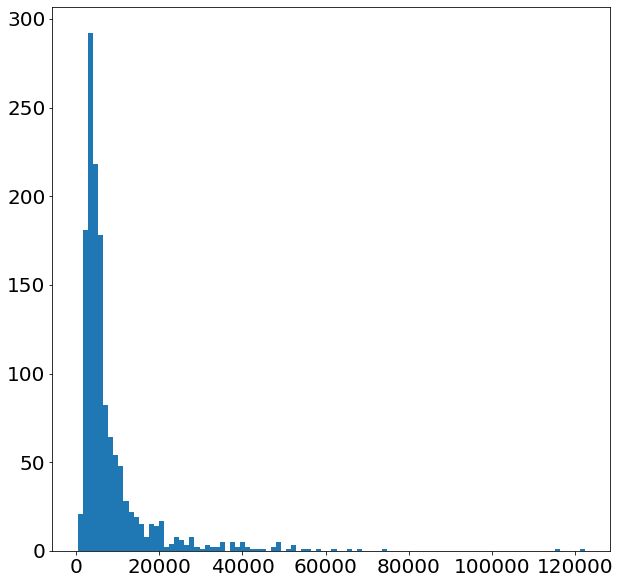

In [43]:
plt.rcParams.update({'font.size' : 20})
plt.figure(figsize=(10,10))
plt.hist(df['Price'], bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

It seems that there are outliers that could affect in sampling our data. Using Interquartile range (IQR), we can follow do the following approach to replace the outliers with a NULL value:

In [44]:
for x in ['Price']:
    q75,q25 = np.percentile(df.loc[:,x],[75,25])
    intr_qr = q75-q25
 
    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)
 
    df.loc[df[x] < min,x] = np.nan
    df.loc[df[x] > max,x] = np.nan

In [45]:
df.isnull().sum()

Name                        0
Brand                       0
Model                       0
Battery capacity (mAh)      0
Screen size (inches)        0
Touchscreen                 0
Resolution x                0
Resolution y                0
Processor                   0
RAM (MB)                    0
Internal storage (GB)       0
Rear camera                 0
Front camera                0
Operating system            0
Wi-Fi                       0
Bluetooth                   0
GPS                         0
Number of SIMs              0
3G                          0
4G/ LTE                     0
Price                     142
dtype: int64

We can now see that there 142 outliers. We now drop them.

In [46]:
df2 = df.dropna(axis = 0)
df2.isnull().sum()

Name                      0
Brand                     0
Model                     0
Battery capacity (mAh)    0
Screen size (inches)      0
Touchscreen               0
Resolution x              0
Resolution y              0
Processor                 0
RAM (MB)                  0
Internal storage (GB)     0
Rear camera               0
Front camera              0
Operating system          0
Wi-Fi                     0
Bluetooth                 0
GPS                       0
Number of SIMs            0
3G                        0
4G/ LTE                   0
Price                     0
dtype: int64

In [47]:
df2

,Name,Brand,Model,Battery capacity (mAh),Screen size (inches),Touchscreen,Resolution x,Resolution y,Processor,RAM (MB),...,Rear camera,Front camera,Operating system,Wi-Fi,Bluetooth,GPS,Number of SIMs,3G,4G/ LTE,Price
11,Realme X,Realme,X,3765,6.53,1,1080,2340,8,4000,...,48.0,16.0,Android,1,1,1,2,1,1,10499.3
12,Xiaomi Redmi K20,Xiaomi,Redmi K20,4000,6.39,1,1080,2340,8,6000,...,48.0,20.0,Android,1,1,1,2,1,1,13497.4
15,Realme 3 Pro,Realme,3 Pro,4045,6.30,1,1080,2340,8,4000,...,16.0,25.0,Android,1,1,1,2,1,1,9799.3
17,Redmi Note 7 Pro,Xiaomi,Redmi Note 7 Pro,4000,6.30,1,1080,2340,8,4000,...,48.0,13.0,Android,1,1,1,2,1,1,6859.3
29,Asus ZenFone Max Pro M1,Asus,ZenFone Max Pro M1,5000,5.99,1,1080,2160,8,3000,...,13.0,8.0,Android,1,1,1,2,1,1,6993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354,Intex Aqua A2,Intex,Aqua A2,1500,4.00,1,480,800,4,512,...,5.0,0.3,Android,1,1,1,2,1,0,1819.3
1355,Videocon Infinium Z51 Nova+,Videocon,Infinium Z51 Nova+,2000,5.00,1,480,854,4,1000,...,8.0,5.0,Android,1,1,1,2,1,0,2058.0
1356,Intex Aqua Y4,Intex,Aqua Y4,1700,4.50,1,480,854,2,512,...,5.0,2.0,Android,1,1,0,2,1,0,2099.3
1357,iBall Andi4 B20,iBall,Andi4 B20,1250,4.00,1,480,800,1,256,...,2.0,0.3,Android,1,1,1,2,1,0,1748.6


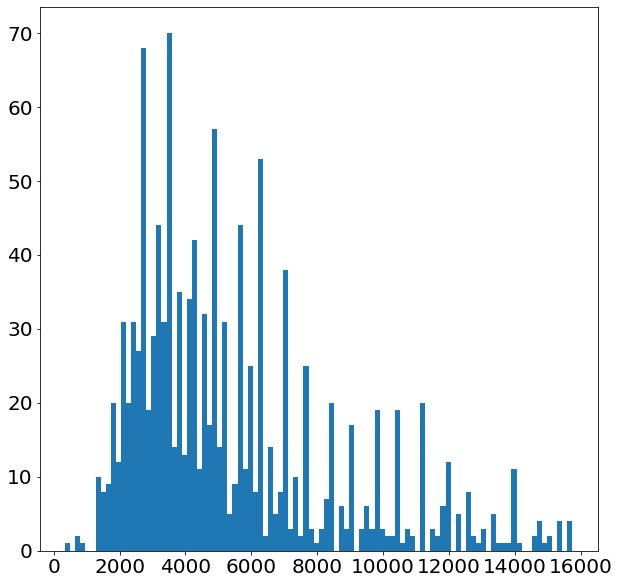

In [48]:
plt.rcParams.update({'font.size' : 20})
plt.figure(figsize=(10,10))
plt.hist(df2['Price'], bins=100)
plt.savefig('Histogram_PDF', bbox_inches='tight')

In [49]:
df2.shape

(1217, 21)

In [50]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn import preprocessing
# from sklearn import utils

# X = df2.drop(["Name", 'Brand', 'Model', 'Operating system', 'Price'], axis = 1)
# y = df2['Price'].values

# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()
# y_transformed = lab.fit_transform(y)

# #view transformed values
# print(y_transformed)


# feature_selector = RandomForestClassifier()
# feature_selector.fit(X,y_transformed)
# features = X.columns
# feature_imps = feature_selector.feature_importances_
# mean_imp = feature_imps.mean()

# plt.figure(figsize=(20,8))
# plt.title("Feature Importance",fontsize=15)
# plt.bar(features,feature_imps,color="orange",label="Not Important")
# plt.bar(features[feature_imps>mean_imp],feature_imps[feature_imps>mean_imp],color="r",label="Important")
# plt.axhline(mean_imp,color="k",linestyle="dashed")
# plt.xlabel("Features",fontsize=12)
# plt.ylabel("Importace Score",fontsize=12)
# plt.legend(fontsize=12)

# parameters = {'axes.labelsize': 8,
#            'axes.titlesize': 5, 
#               'xtick.labelsize':8}
# plt.rcParams.update(parameters)

# plt.show()

In [51]:
unwanted_features = ['Name', 'Brand', 'Model', 'Operating system', 'Price','Touchscreen', 'Resolution x','Wi-Fi', 'Bluetooth', 'GPS', 'Processor',
       'Number of SIMs', '3G', '4G/ LTE']
X = df2.drop(unwanted_features,axis=1)
y = df2['Price'].values

In [52]:
print(X)

      Battery capacity (mAh)  Screen size (inches)  Resolution y  RAM (MB)  \
11                      3765                  6.53          2340      4000   
12                      4000                  6.39          2340      6000   
15                      4045                  6.30          2340      4000   
17                      4000                  6.30          2340      4000   
29                      5000                  5.99          2160      3000   
...                      ...                   ...           ...       ...   
1354                    1500                  4.00           800       512   
1355                    2000                  5.00           854      1000   
1356                    1700                  4.50           854       512   
1357                    1250                  4.00           800       256   
1358                    2150                  5.00           854      1000   

      Internal storage (GB)  Rear camera  Front camera  
11    

In [53]:
print(y)
y.shape

[10499.3 13497.4  9799.3 ...  2099.3  1748.6  2799.3]


(1217,)

In [54]:
X.describe()

,Battery capacity (mAh),Screen size (inches),Resolution y,RAM (MB),Internal storage (GB),Rear camera,Front camera
count,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000,1217.000000
mean,2877.046836,5.226278,1395.701726,2220.418242,24.759211,11.050781,6.608135
std,869.794018,0.650128,481.179585,1333.307651,24.720374,7.278502,5.880250
min,1010.000000,2.400000,320.000000,64.000000,0.064000,0.000000,0.000000
25%,2200.000000,5.000000,960.000000,1000.000000,8.000000,8.000000,2.000000
50%,2800.000000,5.000000,1280.000000,2000.000000,16.000000,12.000000,5.000000
75%,3315.000000,5.500000,1920.000000,3000.000000,32.000000,13.000000,8.000000
max,6000.000000,7.000000,2880.000000,8000.000000,128.000000,64.000000,32.000000


In [55]:
#split dataset into training and test sets using 80/20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

#Standardize the remaining features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

RF R2	0.47165661336965115

DTR R2	0.1843356413831213

SVR R2	-0.04652071761155274

KNR R2	0.4868450806411526

XGB R2	0.40278119463972983



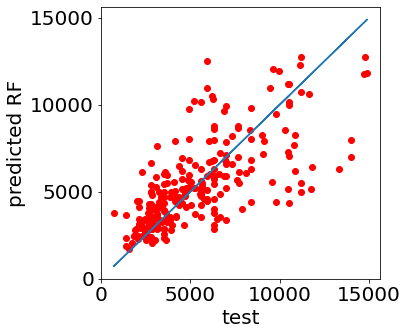

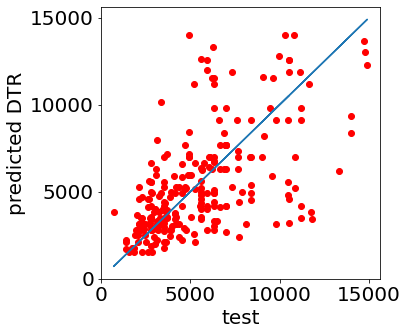

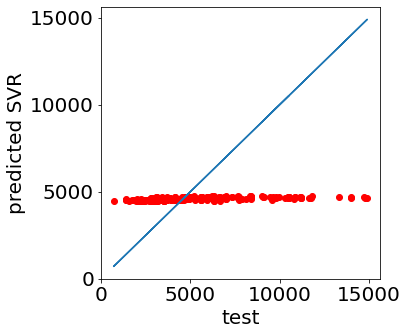

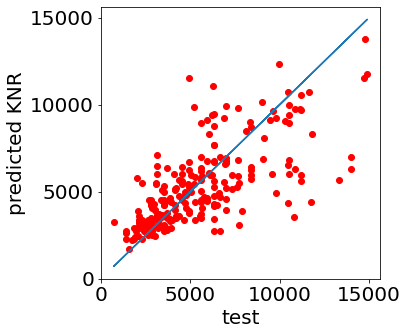

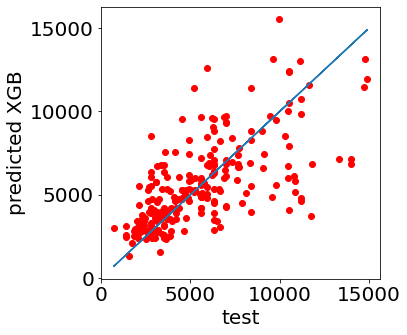

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

from sklearn.metrics import r2_score

rfr = RandomForestRegressor(random_state = 2)
rfr.fit(X_train_scaled,y_train)
y_pred_rfr = rfr.predict(X_test_scaled)
print('RF R2\t' + str(r2_score(y_test, y_pred_rfr))+ '\n')

xPlot=y_test
yPlot=y_pred_rfr
plt.figure(figsize=(5,5))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('predicted RF')
plt.xlabel('test')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

dtr = DecisionTreeRegressor()
dtr.fit(X_train_scaled, y_train)
y_pred_dtr=dtr.predict(X_test_scaled)
print('DTR R2\t' + str(r2_score(y_test, y_pred_dtr))+ '\n')

xPlot=y_test
yPlot=y_pred_dtr
plt.figure(figsize=(5,5))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('predicted DTR')
plt.xlabel('test')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

svr = SVR()
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)
print('SVR R2\t' + str(r2_score(y_test, y_pred_svr))+ '\n')

xPlot=y_test
yPlot=y_pred_svr
plt.figure(figsize=(5,5))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('predicted SVR')
plt.xlabel('test')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

knr = KNeighborsRegressor()
knr.fit(X_train_scaled,y_train)
y_pred_knr= knr.predict(X_test_scaled)
print('KNR R2\t' + str(r2_score(y_test, y_pred_knr))+ '\n')

xPlot=y_test
yPlot=y_pred_knr
plt.figure(figsize=(5,5))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('predicted KNR')
plt.xlabel('test')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

xgb = XGBRegressor()
xgb.fit(X_train_scaled,y_train)
y_pred_xgb= xgb.predict(X_test_scaled)
print('XGB R2\t' + str(r2_score(y_test, y_pred_xgb))+ '\n')

xPlot=y_test
yPlot=y_pred_xgb
plt.figure(figsize=(5,5))
plt.plot(xPlot,yPlot,'ro')
plt.plot(xPlot,xPlot)
plt.ylabel('predicted XGB')
plt.xlabel('test')
plt.savefig('RF_Correlation_Test', bbox_inches='tight')

The goodness-of-fit isn't promising for this model. But we can see that below the price of 6000, the sampled data are strongly correlated.

In [ ]:
# df2

In [ ]:
# conditions = [
#     df2['Price'] < 2000,
#     (df2['Price']>= 2000) & (df2['Price'] < 4000),
#     (df2['Price'] >= 4000) & (df2['Price'] < 6000),
#     (df2['Price'] >= 6000)& (df2['Price'] <=8000),
#     (df2['Price'] >= 8000)& (df2['Price'] <=10000),
#     (df2['Price'] >= 10000)& (df2['Price'] <=12000),
#     (df2['Price'] >= 12000)& (df2['Price'] <=14000),
#     (df2['Price'] >= 14000)& (df2['Price'] <=16000)]
     
# values = [1,2,3,4,5,6,7,8]

# df2['Price_range'] = np.select(conditions, values)
# df2

In [ ]:
# y2 = df2['Price_range'].values
# y2
# import matplotlib.pyplot as plt
# plt.rcParams.update({'font.size' : 20})
# plt.figure(figsize=(10,10))
# plt.hist(y2, bins=100)
# plt.savefig('Histogram_PDF', bbox_inches='tight')

In [ ]:
# #split dataset into training and test sets using 80/20
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y2, test_size=.2)

# #Standardize the remaining features
# from sklearn.preprocessing import StandardScaler

# scaler = StandardScaler().fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [ ]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.tree import DecisionTreeRegressor
# from sklearn.svm import SVR
# from sklearn.neighbors import KNeighborsRegressor
# from xgboost import XGBRegressor

# from sklearn.metrics import r2_score

# rfr = RandomForestRegressor(random_state = 2)
# rfr.fit(X_train_scaled,y_train)
# y_pred_rfr = rfr.predict(X_test_scaled)
# print('RF R2\t' + str(r2_score(y_test, y_pred_rfr))+ '\n')

# xPlot=y_test
# yPlot=y_pred_rfr
# plt.figure(figsize=(5,5))
# plt.plot(xPlot,yPlot,'ro')
# plt.plot(xPlot,xPlot)
# plt.ylabel('predicted RF')
# plt.xlabel('test')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')

# dtr = DecisionTreeRegressor()
# dtr.fit(X_train_scaled, y_train)
# y_pred_dtr=dtr.predict(X_test_scaled)
# print('RF R2\t' + str(r2_score(y_test, y_pred_dtr))+ '\n')

# xPlot=y_test
# yPlot=y_pred_dtr
# plt.figure(figsize=(5,5))
# plt.plot(xPlot,yPlot,'ro')
# plt.plot(xPlot,xPlot)
# plt.ylabel('predicted DTR')
# plt.xlabel('test')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')

# svr = SVR()
# svr.fit(X_train_scaled, y_train)
# y_pred_svr = svr.predict(X_test_scaled)
# print('RF R2\t' + str(r2_score(y_test, y_pred_svr))+ '\n')

# xPlot=y_test
# yPlot=y_pred_svr
# plt.figure(figsize=(5,5))
# plt.plot(xPlot,yPlot,'ro')
# plt.plot(xPlot,xPlot)
# plt.ylabel('predicted SVR')
# plt.xlabel('test')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')

# knr = KNeighborsRegressor()
# knr.fit(X_train_scaled,y_train)
# y_pred_knr= knr.predict(X_test_scaled)
# print('RF R2\t' + str(r2_score(y_test, y_pred_knr))+ '\n')

# xPlot=y_test
# yPlot=y_pred_knr
# plt.figure(figsize=(5,5))
# plt.plot(xPlot,yPlot,'ro')
# plt.plot(xPlot,xPlot)
# plt.ylabel('predicted KNR')
# plt.xlabel('test')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')

# xgb = XGBRegressor()
# xgb.fit(X_train_scaled,y_train)
# y_pred_xgb= xgb.predict(X_test_scaled)
# print('RF R2\t' + str(r2_score(y_test, y_pred_xgb))+ '\n')

# xPlot=y_test
# yPlot=y_pred_xgb
# plt.figure(figsize=(5,5))
# plt.plot(xPlot,yPlot,'ro')
# plt.plot(xPlot,xPlot)
# plt.ylabel('predicted XGB')
# plt.xlabel('test')
# plt.savefig('RF_Correlation_Test', bbox_inches='tight')